**KNN Classifier: Iris flower classifier**

Saving iris.csv to iris.csv
Dataset Loaded Successfully
Shape: (30, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


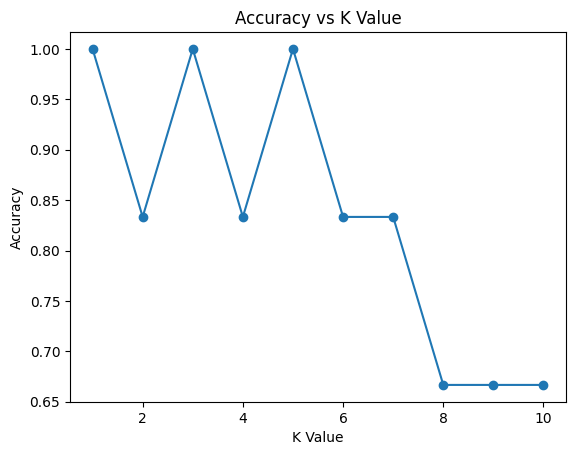


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Confusion Matrix:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]


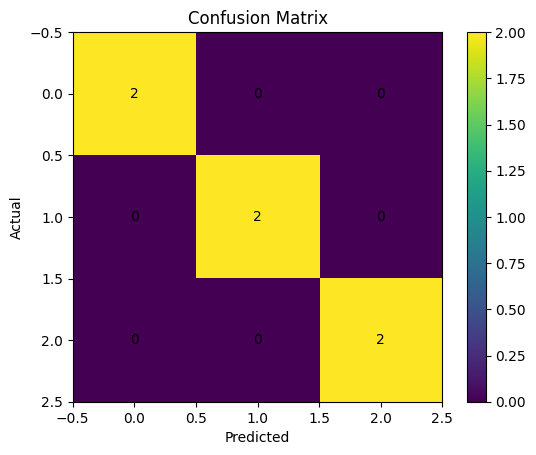

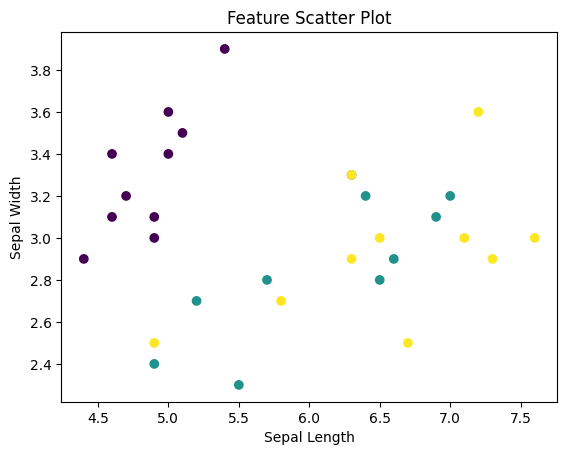

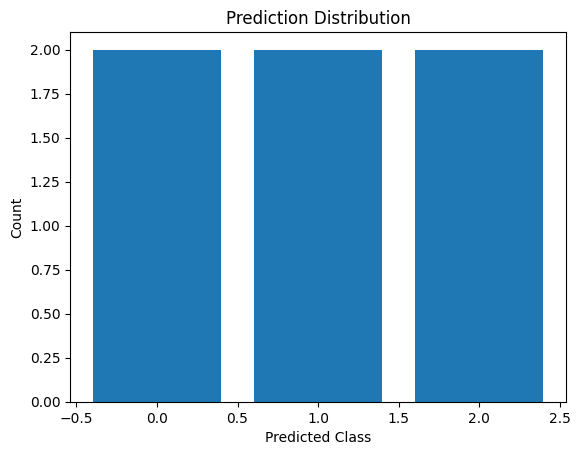


██╗  ██╗███╗   ██╗███╗   ██╗
██║ ██╔╝████╗  ██║████╗  ██║
█████╔╝ ██╔██╗ ██║██╔██╗ ██║
██╔═██╗ ██║╚██╗██║██║╚██╗██║
██║  ██╗██║ ╚████║██║ ╚████║
╚═╝  ╚═╝╚═╝  ╚═══╝╚═╝  ╚═══╝

██████╗ ██████╗  ██████╗ ██████╗
██╔══██╗██╔══██╗██╔═══██╗██╔══██╗
██████╔╝██████╔╝██║   ██║██████╔╝
██╔═══╝ ██╔══██╗██║   ██║██╔═══╝
██║     ██║  ██║╚██████╔╝██║
╚═╝     ╚═╝  ╚═╝ ╚═════╝ ╚═╝

ACCURACY : 100.00 %
PREDICTED FLOWER : SETOSA



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
# 1. Upload CSV File
from google.colab import files
uploaded = files.upload()

# 2. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 3. Load Dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("Dataset Loaded Successfully")
print("Shape:", df.shape)
print(df.head())

# 4. Encode Target Column
target_column = df.columns[-1]
df[target_column] = df[target_column].astype('category')
df[target_column] = df[target_column].cat.codes

X = df.drop(target_column, axis=1)
y = df[target_column]

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Accuracy vs K Graph
k_range = range(1, 11)
accuracy_list = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, pred))

plt.figure()
plt.plot(k_range, accuracy_list, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.show()

# 8. Train Final KNN Model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 9. Evaluation
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 10. Confusion Matrix Graph
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

# 11. Feature Scatter Plot
plt.figure()
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Feature Scatter Plot")
plt.show()

# 12. Prediction Count Bar Graph
unique, counts = np.unique(y_pred, return_counts=True)

plt.figure()
plt.bar(unique, counts)
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Prediction Distribution")
plt.show()

# 13. Predict New Flower
new_flower = [[5.1, 3.5, 1.4, 0.2]]
new_flower_scaled = scaler.transform(new_flower)
prediction = knn.predict(new_flower_scaled)

species_map = {0: "SETOSA", 1: "VERSICOLOR", 2: "VIRGINICA"}
predicted_species = species_map[prediction[0]]

# 14. FINAL ASCII OUTPUT
print("""
██╗  ██╗███╗   ██╗███╗   ██╗
██║ ██╔╝████╗  ██║████╗  ██║
█████╔╝ ██╔██╗ ██║██╔██╗ ██║
██╔═██╗ ██║╚██╗██║██║╚██╗██║
██║  ██╗██║ ╚████║██║ ╚████║
╚═╝  ╚═╝╚═╝  ╚═══╝╚═╝  ╚═══╝

██████╗ ██████╗  ██████╗ ██████╗
██╔══██╗██╔══██╗██╔═══██╗██╔══██╗
██████╔╝██████╔╝██║   ██║██████╔╝
██╔═══╝ ██╔══██╗██║   ██║██╔═══╝
██║     ██║  ██║╚██████╔╝██║
╚═╝     ╚═╝  ╚═╝ ╚═════╝ ╚═╝

ACCURACY : {:.2f} %
PREDICTED FLOWER : {}
""".format(accuracy * 100, predicted_species))
